In [1]:
import pandas as pd
from scipy.stats import spearmanr

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'
sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Arial'})

In [2]:
colors = ['#CA833A',
'#DDB282',
'#EFDCC7',
'#FFFFFF',
'#D0E1EE',
'#96BAD7',
'#5C92BE',
         ]
colors = [s for s in reversed(colors)]

In [5]:
tpm = pd.read_csv('../data/16p12_lcl_gene_tpm_underscores.gct', sep='\t')
tpm['ensembl'] = tpm.Name.apply(lambda s: s.split('.')[0])
tpm = tpm.set_index('ensembl')
tpm = tpm.drop('Name', axis=1)
tpm = tpm.drop('Description', axis=1)

pheno = pd.read_csv('../data/pheno_partial.tsv', sep='\t')
pheno = pheno.set_index('sample', drop=False)

zscores = pd.read_csv('../outlier_expression_analysis/Supp_table_all_variants.SVs_included.csv')

In [6]:
pheno = pheno.sort_values(['family', 'subject'])
tpm = tpm[pheno.index]


In [7]:
genes = list(zscores.Name.unique())

In [8]:
corr, p =spearmanr(tpm.loc[genes])
corr = pd.DataFrame(corr)

In [9]:
corr.columns = pheno.subject
corr.index = corr.columns

In [11]:
labels = list(corr.columns)

for i in range(len(labels)):
    if (i-1) % 3 == 0:
        continue
    labels[i] = ''

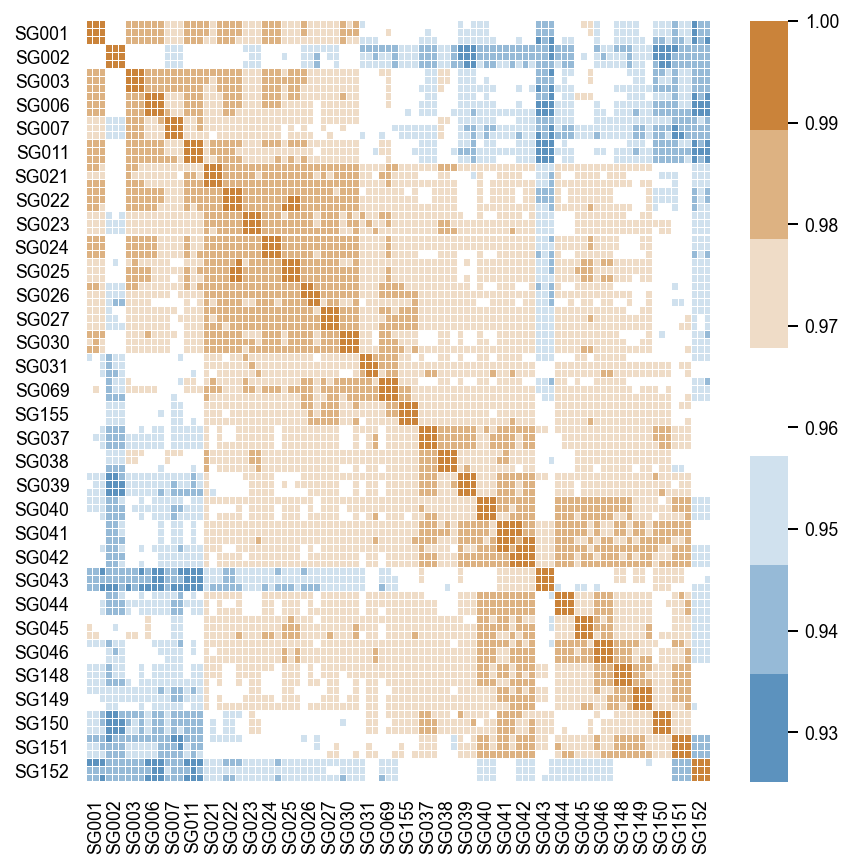

In [12]:
plt.figure(figsize=(7,7))
sns.set_context('paper', font_scale=1)

g = sns.heatmap(corr , linewidths=.01,
           cmap = colors,
           yticklabels = labels,
           xticklabels = labels)

g.tick_params(left=False, bottom=False)
g.set_ylabel('')
g.set_xlabel('')


# plt.tight_layout()
plt.savefig('figures/S2_spearman.pdf', dpi=300)